In [1]:
import os

import numpy as np

import torch
from torch import nn
from torch.nn import functional as F

import matplotlib.pyplot as plt

from utils.helper_functions import load_dm
from utils.arguments import get_parser

from nets.wrapper import *

from pytorch_lightning import Trainer

import json
import pandas

from sklearn.metrics import confusion_matrix
from nets.metrics import print_cm, metrics_from_cm

from data.har.label_mappings import *

In [8]:
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)

In [3]:
parser = get_parser()
args = parser.parse_args('''
--dataset HARTH --batch_size 128 --window_size 1 --normalize --subjects_for_test 21 20 19 
--n_val_subjects 4 --reduce_imbalance --mode ts'''.split())

harthdm = load_dm(args)

cl, counts = harthdm.stsds.SCS.unique(return_counts=True)

parser = get_parser()
args = parser.parse_args('''
--dataset UCI-HAR --batch_size 128 --window_size 1 --normalize --subjects_for_test 21 20 19 
--n_val_subjects 4 --reduce_imbalance --mode ts'''.split())

ucidm = load_dm(args)

uci_cl, uci_counts = ucidm.stsds.SCS.unique(return_counts=True)

parser = get_parser()
args = parser.parse_args('''
--dataset WISDM --batch_size 128 --window_size 1 --normalize --subjects_for_test 21 20 19 
--n_val_subjects 4 --reduce_imbalance --mode ts'''.split())

wisdmdm = load_dm(args)

wisdm_cl, wisdm_counts = wisdmdm.stsds.SCS.unique(return_counts=True)

Loaded dataset HARTH with a total of 6256313 observations for window size 1
Sampling 83448 (balanced) observations per epoch.
Using 4528503 observations for training, 1225365 for validation and 502445 for test
Loaded dataset UCI-HAR with a total of 815614 observations for window size 1
Sampling 76008 (balanced) observations per epoch.
Using 648917 observations for training, 106617 for validation and 85592 for test
Loaded dataset WISDM with a total of 1098172 observations for window size 1
Sampling 232968 (balanced) observations per epoch.
Using 895391 observations for training, 119656 for validation and 83125 for test


In [4]:
harth_bars = [
    'Walk',
    'Run',
    'Shuffle',
    'Stairs-up',
    'Stairs-down',
    'Stand',
    'Sit',
    'Lie',
    'Cycle-sit',
    'Cycle-stand',
    'Cycle-sit-idle',
    'Cycle-stand-idle'
]

In [5]:
uci_bars = ['Walk',
 'Stairs-up',
 'Stairs-down',
 'Sit',
 'Stand',
 'Lie',
 'Stand-Sit',
 'Sit-Stand',
 'Sit-Lie',
 'Lie-Sit',
 'Stand-Lie',
 'Lie-Stand']

In [6]:
wisdm_bars = [
    "Stairs-down",
    "Run",
    "Sit",
    "Stand",
    "Stairs-up",
    "Walk",
]

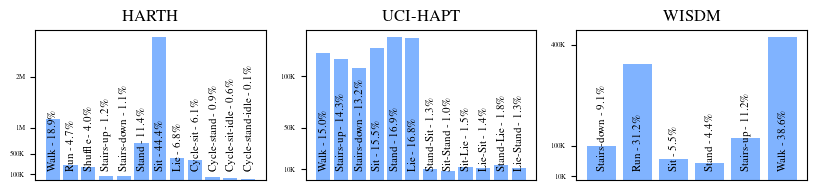

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(8.27, 2))

for i in range(3):
    axes[i].set_xticks([])

custom_color = (.5, .7, 1)

axes[0].bar(cl, counts, color=custom_color)
for i, value in enumerate(harth_bars):
    axes[0].text(i, .05 * max(counts), str(value) + f" - {(counts[i]/sum(counts))*100:.1f}\%", ha='center', va='bottom', rotation=90, fontsize=8)
axes[0].set_yticks([100000, 500000, 1000000, 2000000], ["100K", "500K", "1M", "2M"], fontsize=5)
axes[0].set_title('HARTH')
axes[0].set_ylim([0, 1.05*max(counts)])

axes[1].bar(uci_cl[uci_cl!=100], uci_counts[uci_cl!=100], color=custom_color)
for i, value in enumerate(uci_bars):
    axes[1].text(i, .05 * max(uci_counts[uci_cl!=100]), str(value) + f" - {(uci_counts[i]/sum(uci_counts[uci_cl!=100]))*100:.1f}\%", ha='center', va='bottom', rotation=90, fontsize=8)
axes[1].set_yticks([10000, 50000, 100000], ["10K", "50K", "100K"], fontsize=5)
axes[1].set_title('UCI-HAPT')
axes[1].set_ylim([0, 1.05*max(uci_counts[uci_cl!=100])])

axes[2].bar(wisdm_cl, wisdm_counts, color=custom_color)
for i, value in enumerate(wisdm_bars):
    axes[2].text(i, .05 * max(wisdm_counts), str(value) + f" - {(wisdm_counts[i]/sum(wisdm_counts))*100:.1f}\%", ha='center', va='bottom', rotation=90, fontsize=8)
axes[2].set_yticks([10000, 100000, 400000], ["10K", "100K", "400K"], fontsize=5)
axes[2].set_title('WISDM')
axes[2].set_ylim([0, 1.05*max(wisdm_counts)])

plt.tight_layout()

plt.savefig("out.svg")